# Fixed $Y_i$, Float $\alpha_{\rm MLT}$

If helium abundance is not allowed to vary, how do varaitions in $\alpha_{\rm MLT}$ respond as compared to the scenario where both are permitted to float?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.genfromtxt('data/run08_median_props.txt')       # load median value file
data = np.array([row for row in data if row[30] > -0.5])  # trim metal-poor stars

data_mle = np.genfromtxt('data/run08_kde_props_tmp3.txt')      # load most-likely estimate
data_mle = np.array([row for row in data_mle if row[30] > -0.5])

data = data_mle

Probe how well models recovered fundamental properties of the interferometric sample. Beginning with distance and metallicity recovery.

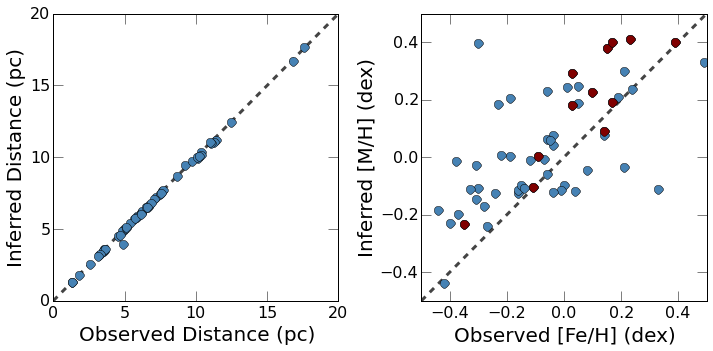

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for axis in ax:
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# distance recovery diagnostic
distance_limits = (0.0, 20.0)
ax[0].set_xlabel('Observed Distance (pc)', fontsize=20.)
ax[0].set_ylabel('Inferred Distance (pc)', fontsize=20.)
ax[0].set_xlim(distance_limits)
ax[0].set_ylim(distance_limits)
ax[0].plot(distance_limits, distance_limits, '--', lw=3, color="#444444")
ax[0].plot(1.0/data[:, 20], data[:, 4], 'o', markersize=9.0, color='#4682B4')

# metallicity recovery diagnostic
quoted_err = np.array([x for x in data if x[31] > 0.0])

FeH_limits = (-0.5, 0.5)
ax[1].set_xlabel('Observed [Fe/H] (dex)', fontsize=20.)
ax[1].set_ylabel('Inferred [M/H] (dex)', fontsize=20.)
ax[1].set_xlim(FeH_limits)
ax[1].set_ylim(FeH_limits)
ax[1].plot(FeH_limits, FeH_limits, '--', lw=3, color="#444444")
ax[1].plot(data[:, 30], data[:, 1], 'o', markersize=9.0, color='#4682B4')
ax[1].plot(quoted_err[:, 30], quoted_err[:, 1], 'o', markersize=9.0, color='#800000')

# auto-adjust subplot spacing
fig.tight_layout()

We see similar trends as in the other trials. Distances are well recovered with very little scatter. Metallicities tend to be larger by around 0.2 dex as compared to the observed values.

Now, define relative errors.

In [4]:
# relative errors
dTheta = (data[:,18] - data[:,8])/data[:,18]
dTeff  = (data[:,24] - 10**data[:,6])/data[:,24]
dFbol  = (data[:,22] - 10**(data[:,7]+ 8.0))/data[:,22]

# uncertainty normalized errors
dTheta_sigma = (data[:,18] - data[:,8])/data[:,19]
dTeff_sigma  = (data[:,24] - 10**data[:,6])/data[:,25]
dFbol_sigma  = (data[:,22] - 10**(data[:,7] + 8.0))/data[:,23]

And compare the overall recovery of observed fundamental properties.

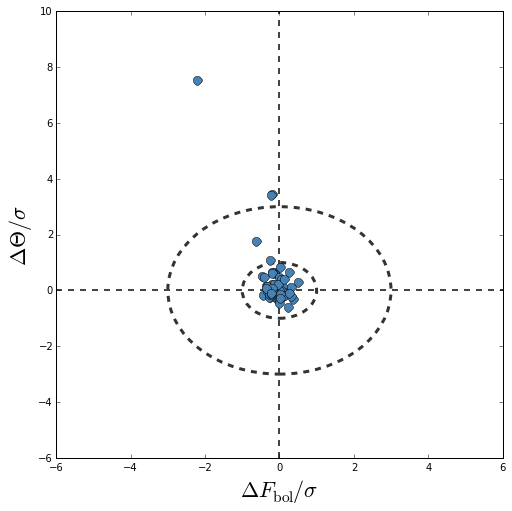

In [5]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# set axis labels
ax.set_xlabel('$\\Delta F_{\\rm bol} / \\sigma$', fontsize=22.)
ax.set_ylabel('$\\Delta \\Theta / \\sigma$', fontsize=22.)
ax.set_xlim(-6.0, 6.0)
ax.set_ylim(-6.0,10.0)

# plot 68% and 99% confidence intervals
ells = [Ellipse(xy=(0.0, 0.0), width=2.*x, height=2.*x, angle=0.0, lw=3, fill=False, 
                linestyle='dashed', edgecolor='#333333') for x in [1.0, 3.0]]
for e in ells:
    ax.add_artist(e)

# plot recovery diagnostics (uncertainty normalized errors)
ax.plot([-6.0, 6.0], [ 0.0, 0.0], '--', lw=2, color="#444444")
ax.plot([ 0.0, 0.0], [-6.0,10.0], '--', lw=2, color="#444444")
ax.plot(dFbol_sigma, dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

Note, will add diagnostic figures later. Beginning with $\alpha_{\rm MLT}$ values and how they vary as a function of stellar fundamental properties and how they compare to Bonaca et al. ([2012, ApJL, 755, L12](http://adsabs.harvard.edu/abs/2012ApJ...755L..12B)). 

Variations of $\alpha_{\rm MLT}$ as a function of stellar properties. Note that we use the most-likely value of the mixing lenght parameter as opposed to the median value.

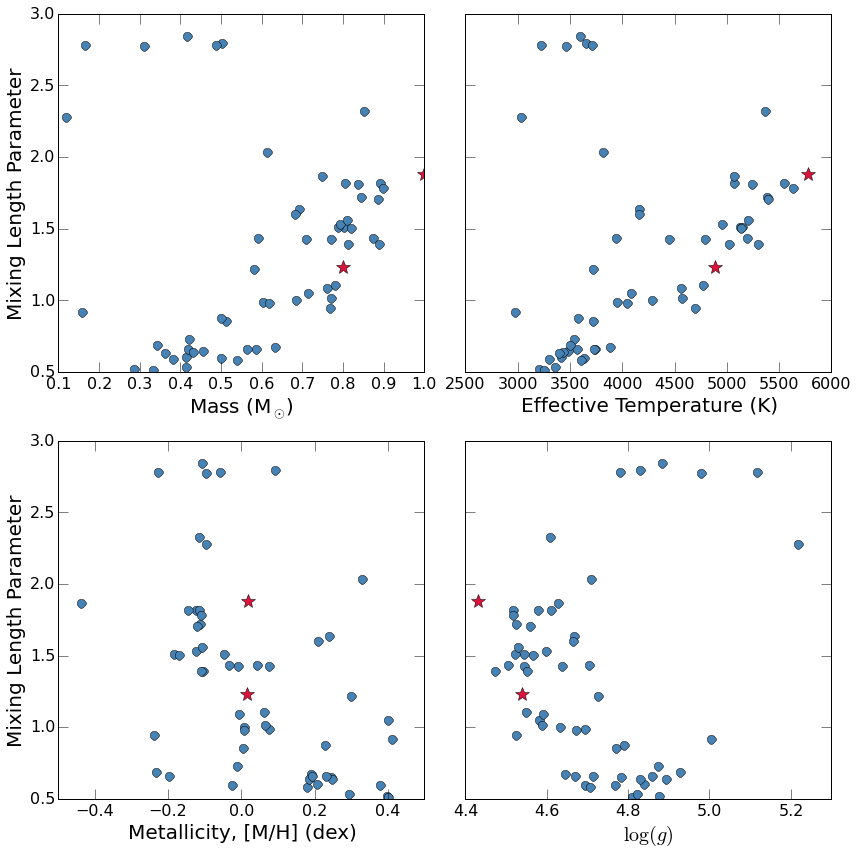

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

ax[0, 0].set_xlabel('Mass (M$_{\\odot}$)', fontsize=20.)
ax[0, 1].set_xlabel('Effective Temperature (K)', fontsize=20.)
ax[1, 0].set_xlabel('Metallicity, [M/H] (dex)', fontsize=20.)
ax[1, 1].set_xlabel('$\\log (g)$', fontsize=20.)
ax[1, 0].set_ylabel('Mixing Length Parameter', fontsize=20.)
ax[0, 0].set_ylabel('Mixing Length Parameter', fontsize=20.)

for x in ax:
    for y in x:
        y.tick_params(which='major', axis='both', length=10., labelsize=16.)

Z_init = (1.0 - data[:, 2])/(10.0**(-1.0*(data[:, 1] + np.log10(0.0247))) + 1.0)        
Log_g  = np.log10(6.67e-8*data[:,0]*1.989e33/(data[:,26]*6.956e10)**2)

# mixing length parameter variation
ax[0, 0].plot(data[:, 0], data_mle[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[1, 0].plot(data[:, 1], data_mle[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[0, 1].plot(10**data[:, 6], data_mle[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[1, 1].plot(Log_g,      data_mle[:, 5], 'o', markersize=9.0, color='#4682B4')

# points of reference (Sun, HD 189733)
ax[0, 0].plot([1.0, 0.80], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[0, 1].plot([5778., 4883.], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[1, 0].plot([0.01876, 0.01614], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[1, 1].plot([4.43, 4.54], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')

fig.tight_layout()

Comments and analysis.

Compute Bonaca et al. predictions for $\alpha_{\rm MLT}$.

In [7]:
B12_coeffs = [-12.77, 0.54, 3.18, 0.52]  # from Table 1: Trilinear analysis
B12_alphas = B12_coeffs[0] + B12_coeffs[1]*Log_g + B12_coeffs[2]*data[:,6] + B12_coeffs[3]*data[:,1]

Finally, compare those predicted from Bonaca et al.'s asteroseismic analysis and our interferometric analysis.

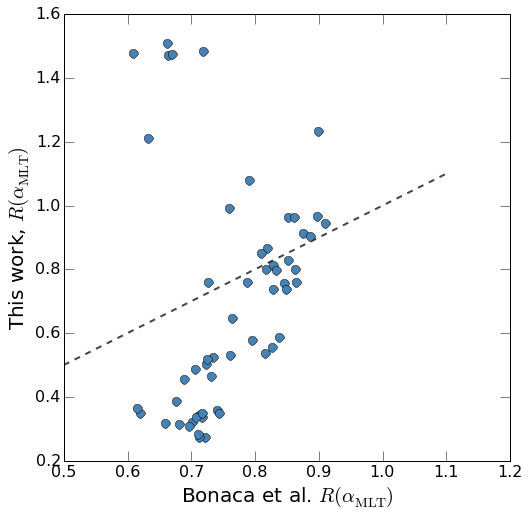

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlabel('Bonaca et al. $R(\\alpha_{\\rm MLT})$', fontsize=20.)
ax.set_ylabel('This work, $R(\\alpha_{\\rm MLT})$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=10., labelsize=16.)

# one-to-one relation
ax.plot([0.5, 1.1], [0.5, 1.1], '--', lw=2, color='#444444')

# compare values
ax.plot(B12_alphas/1.69, data_mle[:,5]/1.884, 'o', lw=2, markersize=9.0, color='#4682B4')

Trends look quite similar to those found when all values were allowed to float. This suggests that variations in $\alpha_{\rm MLT}$ are largely independent of the estimated helium abundance, in so far as models require systematically lower $\alpha_{\rm MLT}$ values among main-sequence stars. It's important to note that, while Bonaca et al. did not find noticable trends with mass, their sample contained stars at multiple evolutionary stages (SGB, RGB), whereas our sample is purely confined to the main sequence. Along the main sequence, $\log(g)$ is a fairly reliable tracer of mass, provided radius variations are not too significant.

Note that since Bonaca et al. only looked at solar-type main-sequence and sub-giant stars, we should restrict our comparison to stars with similar effective temperatures. So, let's constrain our sample of stars to have temperatures between 5000 K and 6000 K, which is more comparable with their sample.

In [9]:
solar_like_sample = np.array([star for star in data if 5000. <= 10**star[6]])
logg_solar = np.log10(6.67e-8*solar_like_sample[:,0]*1.989e33/(solar_like_sample[:,26]*6.956e10)**2)

B12_solar_sample  = B12_coeffs[0] + B12_coeffs[1]*logg_solar + \
            B12_coeffs[2]*solar_like_sample[:,6] + B12_coeffs[3]*solar_like_sample[:,1]

<Container object of 3 artists>

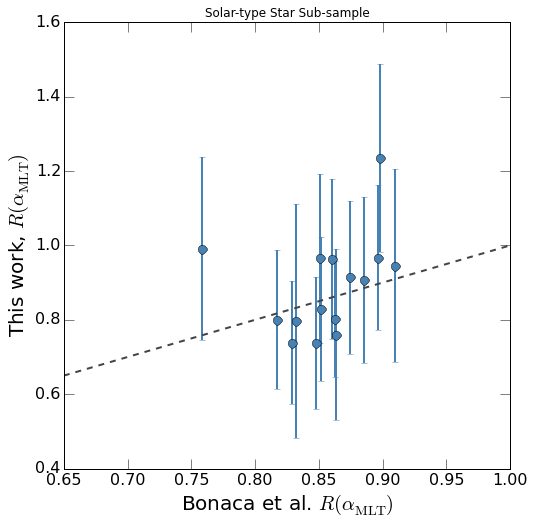

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_title('Solar-type Star Sub-sample')
ax.set_xlabel('Bonaca et al. $R(\\alpha_{\\rm MLT})$', fontsize=20.)
ax.set_ylabel('This work, $R(\\alpha_{\\rm MLT})$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=10., labelsize=16.)

# one-to-one relation
ax.plot([0.65, 1.0], [0.65, 1.0], '--', lw=2, color='#444444')

# compare values
ax.errorbar(B12_solar_sample/1.69, solar_like_sample[:,5]/1.884, yerr=solar_like_sample[:,14]/1.884, 
            fmt='o', lw=2, markersize=9.0, color='#4682B4')